In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras yfinance flask

In [1]:
import yfinance as yf

stock = yf.download("AAPL", start="2020-01-01", end="2025-01-01")

# Display the first few rows
print(stock.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009109  72.771737  71.783954  71.941321  146322800
2020-01-06  72.582924  72.621661  70.876090  71.127881  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


In [3]:
import pandas as pd
print(stock.isnull().sum())
# Fill missing values using forward fill method
stock.fillna(method='ffill', inplace=True)


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


C:\Users\mohan\AppData\Local\Temp\ipykernel_27752\2284639361.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock.fillna(method='ffill', inplace=True)


In [5]:
# Create moving averages as features
stock['MA_10'] = stock['Close'].rolling(window=10).mean()
stock['MA_50'] = stock['Close'].rolling(window=50).mean()

# Drop missing values 
stock.dropna(inplace=True)

print(stock.head())


Price           Close       High        Low       Open     Volume      MA_10  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL              
Date                                                                           
2020-03-13  67.457489  67.930716  61.385659  64.283251  370732000  68.580123   
2020-03-16  58.779282  62.873271  58.242959  58.716183  322423600  67.206559   
2020-03-17  61.363819  62.516541  57.854679  60.065485  324056000  66.321750   
2020-03-18  59.861633  60.669755  57.544048  58.187150  300233600  64.961048   
2020-03-19  59.402966  61.358958  58.876353  60.036358  271857200  63.792791   

Price           MA_50  
Ticker                 
Date                   
2020-03-13  74.122982  
2020-03-16  73.844246  
2020-03-17  73.631340  
2020-03-18  73.376914  
2020-03-19  73.120143  


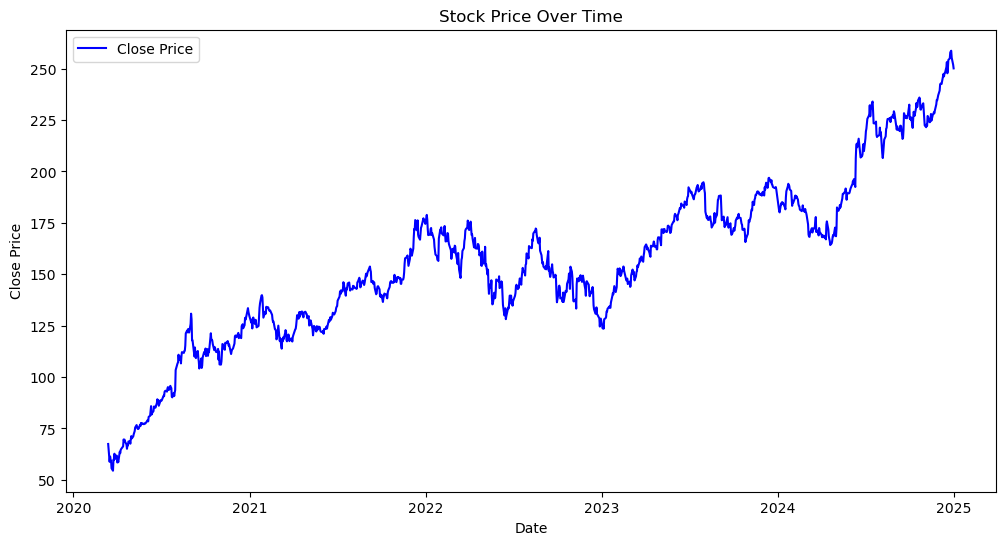

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stock['Close'], label='Close Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
